<b><font color='blue' size="4">Natural Language Processing for <i>"Big Basket"</i> Google App Reviews</font></b>


## <font color='Blue'>Installing necessary Module

In [4]:
pip install textblob

In [ ]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install nrclex

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


## <font color='Blue'>1. Importing Libraries

In [ ]:
import re
import numpy as np
import pandas as pd
import csv
import string
from textblob import TextBlob

# plotting
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# nltk
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk import PorterStemmer

# sklearna
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tripti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## <font color='Blue'>2. Reading the data file

In [ ]:
Rfile = pd.read_excel("Big Basket App REVIEWs.xlsx")
Rfile

,REVIEW,RATE,THUMBS_UP_COUNT
0,"Big number game,not at all reasonable prices a...",1,80
1,"Cheating through cancelation charges , while g...",1,1
2,Why does big basket bring about such an update...,1,48
3,Really irritating app.. Daily receiving msgs a...,1,11
4,"Everytime i proceed to checkout, card payment ...",1,8
...,...,...,...
8395,Comfortable,5,0
8396,Nice servicee,5,0
8397,Very good,5,0
8398,Great,5,0


In [ ]:
Rdata = pd.DataFrame(Rfile[['REVIEW']])
Rdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8400 entries, 0 to 8399
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   REVIEW  8399 non-null   object
dtypes: object(1)
memory usage: 65.8+ KB


In [ ]:
print(Rdata)

                                                 REVIEW
0     Big number game,not at all reasonable prices a...
1     Cheating through cancelation charges , while g...
2     Why does big basket bring about such an update...
3     Really irritating app.. Daily receiving msgs a...
4     Everytime i proceed to checkout, card payment ...
...                                                 ...
8395                                        Comfortable
8396                                      Nice servicee
8397                                          Very good
8398                                              Great
8399                                       Amazing ðŸ˜€

[8400 rows x 1 columns]


## <font color='Blue'> 3. Feature Engineering

### <font color='Blue'> 3.1 Sentiment Column

#### <font color='Blue'> Applying Sentiment Analysis using polarity scores

Here, we have split the entire text data into Positive, Negative and Neutral.

Positive is represented by 3; polarity > 0.5

Neutral is represented by 2; polarity between -0.5 and +0.5

Negative is represented by 1; polarity < 0.5

In [ ]:
# Function to get sentiment polarity
def sentiment_polarity(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    return polarity

In [ ]:
# Ensuring all entries are strings
Rdata['REVIEW'] = Rdata['REVIEW'].astype(str)

In [ ]:
# Applying the sentiment analysis function to the 'REVIEW' column
Rdata['Polarity'] = Rdata['REVIEW'].apply(sentiment_polarity)

In [ ]:
# Function to get sentiment polarity
def sentiment_polarity(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    return polarity

# Applying the sentiment analysis function to the 'REVIEW' column
Rdata['Polarity'] = Rdata['REVIEW'].apply(sentiment_polarity)

# Defining function to categorize polarity scores
def categorize_sentiment(polarity):
    if polarity > 0.5:
        return 3  # Positive
    elif -0.5 <= polarity <= 0.5:
        return 2  # Neutral
    else:
        return 1  # Negative

# Applying sentiment categorization to create a new column 'Sentiment'
Rdata['Sentiment'] = Rdata['Polarity'].apply(categorize_sentiment)


# Print the first few rows of the updated DataFrame
print(Rdata.head())


                                              REVIEW  Polarity  Sentiment
0  Big number game,not at all reasonable prices a... -0.012698          2
1  Cheating through cancelation charges , while g...  0.400000          2
2  Why does big basket bring about such an update...  0.059259          2
3  Really irritating app.. Daily receiving msgs a... -0.210000          2
4  Everytime i proceed to checkout, card payment ... -0.255000          2


## <font color='Blue'> 4. Data Cleaning and Preprocessing

### <font color='Blue'> 4.1 Converting text into lower case

In [ ]:
Rdata['REVIEW']=Rdata['REVIEW'].str.lower()
Rdata['REVIEW'].head()

0    big number game,not at all reasonable prices a...
1    cheating through cancelation charges , while g...
2    why does big basket bring about such an update...
3    really irritating app.. daily receiving msgs a...
4    everytime i proceed to checkout, card payment ...
Name: REVIEW, dtype: object

### <font color='Blue'> 4.2 Removing Stop Words

In [ ]:
stopwords = nltk.corpus.stopwords.words('english')
print("Stopwords in nltk :", stopwords, end = " ")

Stopwords in nltk : ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'sa

In [ ]:
def clean_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stopwords])
Rdata['REVIEW'] = Rdata['REVIEW'].apply(lambda text: clean_stopwords(text))
Rdata['REVIEW'].head()

0    big number game,not reasonable prices worst pa...
1    cheating cancelation charges , go payment , ti...
2    big basket bring update wherein slots showing ...
3    really irritating app.. daily receiving msgs m...
4    everytime proceed checkout, card payment fails...
Name: REVIEW, dtype: object

### <font color='Blue'> 4.3 Removing special characters

In [ ]:
def clean_specialCharacters(data):
    return re.sub(r'((www\.[^\s]+)|(https?://[^\s]+)|(<br />))|/', ' ', data)
Rdata['REVIEW'] = Rdata['REVIEW'].apply(lambda x: clean_specialCharacters(x))
Rdata['REVIEW'].head()

0    big number game,not reasonable prices worst pa...
1    cheating cancelation charges , go payment , ti...
2    big basket bring update wherein slots showing ...
3    really irritating app.. daily receiving msgs m...
4    everytime proceed checkout, card payment fails...
Name: REVIEW, dtype: object

### <font color='Blue'> 4.4 Removing Numeric numbers

In [ ]:
def clean_numbers(data):
    return re.sub('[0-9]+', '', data)
Rdata['REVIEW'] = Rdata['REVIEW'].apply(lambda x: clean_numbers(x))
Rdata['REVIEW'].tail()

8395      comfortable
8396    nice servicee
8397             good
8398            great
8399     amazing ðÿ˜€
Name: REVIEW, dtype: object

### <font color='Blue'> 4.5 Removing punctuations

In [ ]:
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def clean_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
Rdata['REVIEW']= Rdata['REVIEW'].apply(lambda x: clean_punctuations(x))
Rdata['REVIEW'].head()

0    big number gamenot reasonable prices worst par...
1    cheating cancelation charges  go payment  time...
2    big basket bring update wherein slots showing ...
3    really irritating app daily receiving msgs mai...
4    everytime proceed checkout card payment fails ...
Name: REVIEW, dtype: object

### <font color='Blue'> 4.6 Removing repeating characters in single REVIEW

In [ ]:
def clean_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
Rdata['REVIEW'] = Rdata['REVIEW'].apply(lambda x: clean_repeating_char(x))
Rdata['REVIEW'].head()

0    big number gamenot reasonable prices worst par...
1    cheating cancelation charges  go payment  time...
2    big basket bring update wherein slots showing ...
3    really irritating app daily receiving msgs mai...
4    everytime proceed checkout card payment fails ...
Name: REVIEW, dtype: object

##### <font color='Black'> Selecting target columns from dataframe for future Analysis

In [ ]:
Rdata2 = Rdata[['REVIEW']]

### <font color='Blue'> 4.7 Tokenization

In [ ]:
Rdata['REVIEW'] = Rdata['REVIEW'].apply(nltk.word_tokenize)
Rdata['REVIEW'].head()

0    [big, number, gamenot, reasonable, prices, wor...
1    [cheating, cancelation, charges, go, payment, ...
2    [big, basket, bring, update, wherein, slots, s...
3    [really, irritating, app, daily, receiving, ms...
4    [everytime, proceed, checkout, card, payment, ...
Name: REVIEW, dtype: object

### <font color='Blue'> 4.8 Stemming using Porter Stemmer

In [ ]:
st = PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
Rdata['REVIEW']= Rdata['REVIEW'].apply(lambda x: stemming_on_text(x))
Rdata['REVIEW'].head()

0    [big, number, gamenot, reasonable, prices, wor...
1    [cheating, cancelation, charges, go, payment, ...
2    [big, basket, bring, update, wherein, slots, s...
3    [really, irritating, app, daily, receiving, ms...
4    [everytime, proceed, checkout, card, payment, ...
Name: REVIEW, dtype: object

### <font color='Blue'> 4.9 Lemmatizing

In [ ]:
lm = WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data

Rdata['REVIEW'] = Rdata['REVIEW'].apply(lambda x: lemmatizer_on_text(x))
Rdata['REVIEW'].tail()

8395       [comfortable]
8396    [nice, servicee]
8397              [good]
8398             [great]
8399     [amazing, ðÿ˜€]
Name: REVIEW, dtype: object

## <font color='Blue'> 5. Text Preprocessing

### <font color='Blue'> 5.1 Separating input feature and label

In [ ]:
X=Rdata.REVIEW
y=Rdata.Sentiment

## <font color='Blue'> 5.2 Text Vectorization


#### <font color='Blue'> Tokenizinge the REVIEW text and converting data in matrix format

In [ ]:
# Converting the list of lists to a list of strings
preprocessed_X = [' '.join(document) for document in X]

# Initializing the vectorizer
vectorizer = CountVectorizer(stop_words='english')

# Transforming the preprocessed data
X_vec = vectorizer.fit_transform(preprocessed_X)
X_vec = X_vec.todense()
X_vec

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

#### <font color='Blue'>Transforming data by applying term frequency inverse document frequency (TF-IDF)

In [ ]:
# Converting the list of lists to a list of strings
preprocessed_X = [' '.join(document) for document in X]

# Initializing the vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Transforming the preprocessed data using TF-IDF
X_tfidf = vectorizer.fit_transform(preprocessed_X)

# Converting the sparse matrix to a dense matrix (for demonstration purposes)
X_tfidf_dense = X_tfidf.todense()

# Displaying the dense TF-IDF matrix (replace this with your preferred display method)
print(X_tfidf_dense)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## <font color='Blue'> 6. MODELLING

#### <font color='Blue'>Splitting data into Train and Test Subset with in 80% - 20% ratio

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size = 0.20, random_state = 10)

### <font color='Blue'>6.1 Naive Bayes - Model

In [ ]:
# Training the model
clf_NB = MultinomialNB()
clf_NB.fit(X_train, y_train)

MultinomialNB()

#### <font color='Blue'>Predicting the Test  results

In [ ]:
y_pred_1 = clf_NB.predict(X_test)
print(classification_report(y_test, y_pred_1, zero_division=1))

              precision    recall  f1-score   support

           1       1.00      0.00      0.00        36
           2       0.86      1.00      0.92      1313
           3       0.98      0.46      0.63       331

    accuracy                           0.87      1680
   macro avg       0.95      0.49      0.52      1680
weighted avg       0.89      0.87      0.84      1680



#### <font color='Blue'> Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_1)
cm

array([[   0,   36,    0],
       [   0, 1310,    3],
       [   0,  179,  152]], dtype=int64)

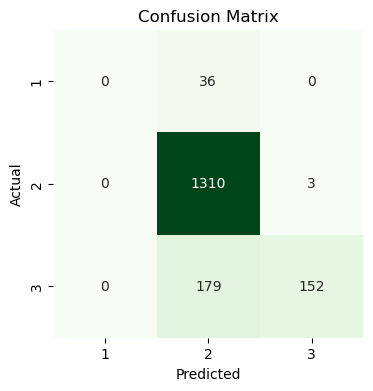

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = clf_NB.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

class_labels = ['1', '2', '3']
# Ploting confusion matrix using seaborn and matplotlib
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()




### <font color='Blue'>6.2 Logistic Regression

In [ ]:
# Training the model
clf_LR = LogisticRegression()
clf_LR.fit(X_train, y_train)

LogisticRegression()

#### <font color='Blue'>Predicting the Test  results

In [ ]:
y_pred_2 = clf_LR.predict(X_test)
print(classification_report(y_test, y_pred_2, zero_division=1))

              precision    recall  f1-score   support

           1       1.00      0.25      0.40        36
           2       0.92      0.99      0.95      1313
           3       0.96      0.72      0.82       331

    accuracy                           0.92      1680
   macro avg       0.96      0.65      0.73      1680
weighted avg       0.93      0.92      0.92      1680



#### <font color='Blue'>Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test, y_pred_2)
cm2

array([[   9,   27,    0],
       [   0, 1304,    9],
       [   0,   93,  238]], dtype=int64)

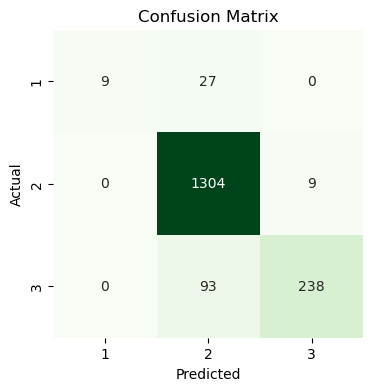

In [ ]:
y_pred2 = clf_LR.predict(X_test)
cm2 = confusion_matrix(y_test, y_pred2)
class_labels = ['1', '2', '3']
# Plot confusion matrix using seaborn and matplotlib
plt.figure(figsize=(4, 4))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Greens', cbar=False, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### <font color='Blue'>6.3 Random Forest

In [ ]:
# Training the model
from sklearn.ensemble import RandomForestClassifier
clf_RF = RandomForestClassifier()
clf_RF.fit(X_train, y_train)

RandomForestClassifier()

#### <font color='Blue'>Predicting the Test  results

In [ ]:
y_pred_3 = clf_RF.predict(X_test)
print(classification_report(y_test, y_pred_3, zero_division=1))

              precision    recall  f1-score   support

           1       0.92      0.33      0.49        36
           2       0.92      0.99      0.96      1313
           3       0.96      0.75      0.84       331

    accuracy                           0.93      1680
   macro avg       0.94      0.69      0.76      1680
weighted avg       0.93      0.93      0.92      1680



#### <font color='Blue'>Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm3 = confusion_matrix(y_test, y_pred_3)
cm3

array([[  12,   24,    0],
       [   1, 1302,   10],
       [   0,   82,  249]], dtype=int64)

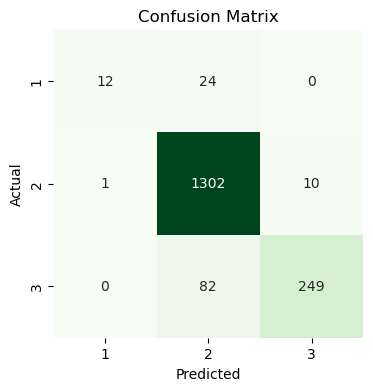

In [ ]:
y_pred3 = clf_RF.predict(X_test)
cm3 = confusion_matrix(y_test, y_pred3)
class_labels = ['1', '2', '3']
# Plot confusion matrix using seaborn and matplotlib
plt.figure(figsize=(4, 4))
sns.heatmap(cm3, annot=True, fmt='d', cmap='Greens', cbar=False,xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### <font color='Blue'> 6.4 SVM (Support Vector Machines)

In [ ]:
from sklearn.svm import SVC

# Creating an instance of SVM classifier
clf_SVM = SVC()

# Training the SVM classifier on the training data
clf_SVM.fit(X_train, y_train)

SVC()

#### <font color='Blue'>Predicting the Test results

In [ ]:
y_pred_SVM = clf_SVM.predict(X_test)

# Generating the classification report
report = classification_report(y_test, y_pred_SVM)
print(report)

              precision    recall  f1-score   support

           1       0.90      0.25      0.39        36
           2       0.92      1.00      0.96      1313
           3       0.98      0.74      0.85       331

    accuracy                           0.93      1680
   macro avg       0.94      0.66      0.73      1680
weighted avg       0.93      0.93      0.92      1680



#### <font color='Blue'>Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm4 = confusion_matrix(y_test, y_pred_SVM)
cm4

array([[   9,   27,    0],
       [   1, 1308,    4],
       [   0,   85,  246]], dtype=int64)

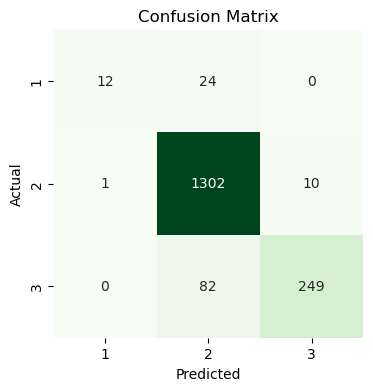

In [ ]:
y_pred_SVM = clf_RF.predict(X_test)
cm4 = confusion_matrix(y_test, y_pred_SVM)
class_labels = ['1', '2', '3']
# Ploting confusion matrix using seaborn and matplotlib
plt.figure(figsize=(4, 4))
sns.heatmap(cm3, annot=True, fmt='d', cmap='Greens', cbar=False,xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### <font color='Blue'>Comparing Accuracy

1. **Naive Bayes:**
   - Accuracy: 87%


2. **Logistic Regression (LR):**
   - Accuracy: 92%

3. **Random Forest (RF):**
   - Accuracy: 93%

4. **Support Vector Machine (SVM):**
   - Accuracy: 93%


- **Logistic Regression (LR)** seems to have the second-highest accuracy among all the models.
- **Naive Bayes** has a lower accuracy than LR but might still have strengths in certain scenarios, especially if the dataset is imbalanced.
- **Random Forest (RF)** and **SVM** have similar accuracy values having the highest accuracy among all the models.


## <font color='Blue'>7. Sentiment Analysis

### <font color='Blue'>7.1 Sentiment Analysis using NRClex (National Research Council Canada) on the non-vectorized data

In [ ]:
from nrclex import NRCLex

In [ ]:
sentiments = []

for REVIEW in Rdata2['REVIEW']:
    emotion_analyzer = NRCLex(REVIEW)
    emotions = emotion_analyzer.affect_frequencies
    sentiments.append(emotions)

In [ ]:
# Creating a new DataFrame with sentiment information
sentiments_df = pd.DataFrame(sentiments)
# Combining with the original DataFrame
result_df = pd.concat([Rdata2, sentiments_df], axis=1)

In [ ]:
result_df

,REVIEW,fear,anger,anticip,trust,surprise,positive,negative,sadness,disgust,joy,anticipation
0,big number gamenot reasonable prices worst par...,0.000000,0.000000,0.0,0.222222,0.055556,0.333333,0.055556,0.055556,0.000000,0.111111,0.166667
1,cheating cancelation charges go payment time...,0.000000,0.100000,0.0,0.050000,0.050000,0.150000,0.350000,0.050000,0.100000,0.050000,0.100000
2,big basket bring update wherein slots showing ...,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN
3,really irritating app daily receiving msgs mai...,0.071429,0.142857,0.0,0.000000,0.071429,0.142857,0.142857,0.000000,0.142857,0.071429,0.214286
4,everytime proceed checkout card payment fails ...,0.000000,0.076923,0.0,0.153846,0.076923,0.076923,0.230769,0.076923,0.153846,0.076923,0.076923
...,...,...,...,...,...,...,...,...,...,...,...,...
8395,comfortable,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
8396,nice servicee,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
8397,good,0.000000,0.000000,0.0,0.200000,0.200000,0.200000,0.000000,0.000000,0.000000,0.200000,0.200000
8398,great,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN


#### <font color='Blue'>Determining dominant emotions

In [ ]:
# Determining dominant emotions
dominant_emotions = result_df[['anger', 'anticipation', 'disgust', 'fear', 'joy', 'negative', 'positive', 'sadness', 'surprise', 'trust']].idxmax(axis=1)
result_df['Dominant Emotion'] = dominant_emotions

# Printing the DataFrame with dominant emotions
print(result_df[['REVIEW', 'Dominant Emotion']])

                                                 REVIEW Dominant Emotion
0     big number gamenot reasonable prices worst par...         positive
1     cheating cancelation charges  go payment  time...         negative
2     big basket bring update wherein slots showing ...         positive
3     really irritating app daily receiving msgs mai...     anticipation
4     everytime proceed checkout card payment fails ...         negative
...                                                 ...              ...
8395                                        comfortable            anger
8396                                      nice servicee            anger
8397                                               good     anticipation
8398                                              great            anger
8399                                       amazing ðÿ˜€            anger

[8400 rows x 2 columns]


### <font color='Blue'>7.2 Sentiment Analysis using SentiWordNet lexicon

In [ ]:
nltk.download('sentiwordnet')

[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\Tripti\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


True

In [ ]:
from nltk.corpus import sentiwordnet as swn

In [ ]:
# Initializing an empty list to store sentiment scores
sentiments = []

# Function to calculate a single sentiment score for a text
def calculate_overall_sentiment_score(text):
    overall_score = 0

    for word in text:
        synsets = list(swn.senti_synsets(word))

        for synset in synsets:
            overall_score += synset.pos_score() - synset.neg_score()

    return overall_score

# Applying sentiment analysis to each review in the 'review' column
for REVIEW in Rdata2['REVIEW']:
    sentiment_score = calculate_overall_sentiment_score(REVIEW)
    sentiments.append(sentiment_score)

# Creating a new DataFrame with sentiment information
sentiments_df = pd.DataFrame(sentiments, columns=['Overall_Score'])

# Combining with the original DataFrame
Rdata3 = pd.concat([Rdata2, sentiments_df], axis=1)

# Creating a new column 'swn_analysis' based on the overall score
def categorize_swn_sentiment(score):
    if score > 0:
        return 'positive'
    elif score < 0:
        return 'negative'
    else:
        return 'neutral'

Rdata3['swn_analysis'] = Rdata3['Overall_Score'].apply(categorize_swn_sentiment)

# Printing the updated DataFrame
print(Rdata3[['REVIEW', 'swn_analysis']])


                                                 REVIEW swn_analysis
0     big number gamenot reasonable prices worst par...     positive
1     cheating cancelation charges  go payment  time...     positive
2     big basket bring update wherein slots showing ...     negative
3     really irritating app daily receiving msgs mai...     negative
4     everytime proceed checkout card payment fails ...     positive
...                                                 ...          ...
8395                                        comfortable     positive
8396                                      nice servicee     positive
8397                                               good     negative
8398                                              great     positive
8399                                       amazing ðÿ˜€     negative

[8400 rows x 2 columns]


### <font color='Blue'> 7.3 Sentiment Analysis using VADER (Valence Aware Dictionary and Sentiment Reasoner)

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
# Initializing an empty list to store sentiment scores
vader_sentiments = []

# Creating a Vader sentiment analyzer
vader_analyzer = SentimentIntensityAnalyzer()

# Function to calculate Vader sentiment scores for a text
def calculate_vader_sentiment_scores(text):
    sentiment_scores = vader_analyzer.polarity_scores(text)
    return sentiment_scores['compound']

# Applying Vader sentiment analysis to each review in the 'REVIEW' column
for REVIEW in Rdata2['REVIEW']:
    vader_sentiment_score = calculate_vader_sentiment_scores(REVIEW)
    vader_sentiments.append(vader_sentiment_score)

# Creating a new DataFrame with Vader sentiment information
vader_sentiments_df = pd.DataFrame(vader_sentiments, columns=['Vader_Score'])

# Combining with the original DataFrame
Rdata4 = pd.concat([Rdata2, vader_sentiments_df], axis=1)

# Creating a new column 'vader_analysis' based on the Vader score
def categorize_vader_sentiment(score):
    if score > 0.05:
        return 'positive'
    elif score < -0.05:
        return 'negative'
    else:
        return 'neutral'

Rdata4['vader_analysis'] = Rdata4['Vader_Score'].apply(categorize_vader_sentiment)

# Printing the updated DataFrame with Vader analysis
print(Rdata4[['REVIEW','vader_analysis']])


                                                 REVIEW vader_analysis
0     big number gamenot reasonable prices worst par...       positive
1     cheating cancelation charges  go payment  time...       negative
2     big basket bring update wherein slots showing ...       negative
3     really irritating app daily receiving msgs mai...       negative
4     everytime proceed checkout card payment fails ...       negative
...                                                 ...            ...
8395                                        comfortable       positive
8396                                      nice servicee       positive
8397                                               good       positive
8398                                              great       positive
8399                                       amazing ðÿ˜€       positive

[8400 rows x 2 columns]


### <font color='Blue'> Comparing results of Sentiment Analysis

In [ ]:
# Extracting the relevant columns from each DataFrame
result_df_subset = result_df[['Dominant Emotion']]
Rdata3_subset = Rdata3[['swn_analysis']]
Rdata4_subset = Rdata4[['vader_analysis']]

# Concatenating the subsets along the columns
concatenated_df = pd.concat([result_df_subset, Rdata3_subset, Rdata4_subset], axis=1)

# Printing the concatenated DataFrame
print(concatenated_df)


     Dominant Emotion swn_analysis vader_analysis
0            positive     positive       positive
1            negative     positive       negative
2            positive     negative       negative
3        anticipation     negative       negative
4            negative     positive       negative
...               ...          ...            ...
8395            anger     positive       positive
8396            anger     positive       positive
8397     anticipation     negative       positive
8398            anger     positive       positive
8399            anger     negative       positive

[8400 rows x 3 columns]


## <font color='Blue'>8. Topic Modeling

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

### <font color='Blue'> 8.1 LDA (Latent Dirichlet Allocation) Model

In [ ]:
number_of_topics = 5
lda = LatentDirichletAllocation(n_components=number_of_topics, random_state=42)
lda.fit( np.asarray(X_vec))

LatentDirichletAllocation(n_components=5, random_state=42)

In [ ]:
# Displaying topics and top words for each topic
feature_names = vectorizer.get_feature_names_out()
num_words = 10

for idx, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[-num_words:][::-1]
    top_words = [feature_names[i] for i in top_words_idx]
    print(f"Topic {idx+1}: {', '.join(top_words)}")

Topic 1: big, basket, app, customer, service, products, bb, bad, worst, time
Topic 2: good, items, app, delivery, quality, products, vegetables, time, service, stock
Topic 3: money, wallet, order, big, refund, basket, product, bb, delivery, available
Topic 4: order, delivery, payment, option, app, card, sodexo, items, pay, online
Topic 5: available, slots, app, slot, time, order, shows, showing, days, delivery


#### <font color='Blue'> 8.1.1 Word Clouds for 5 Topics

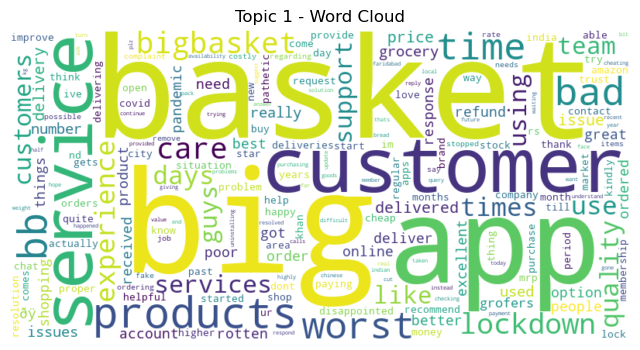

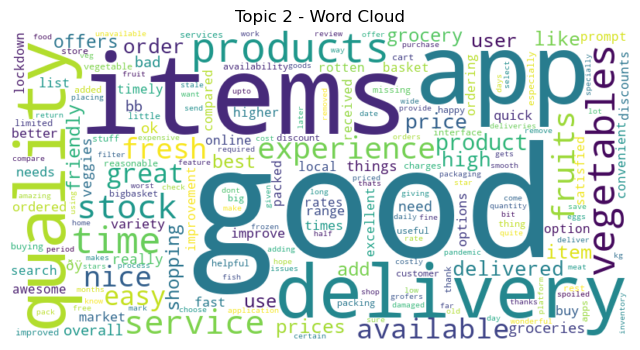

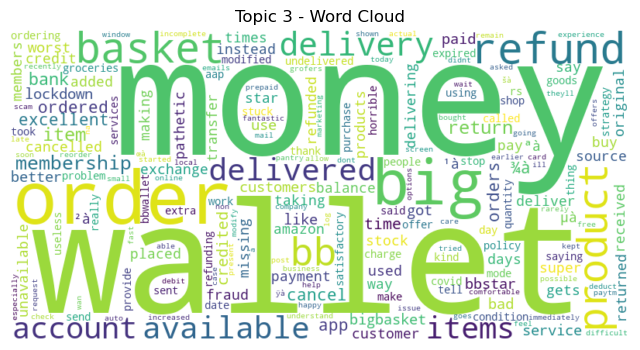

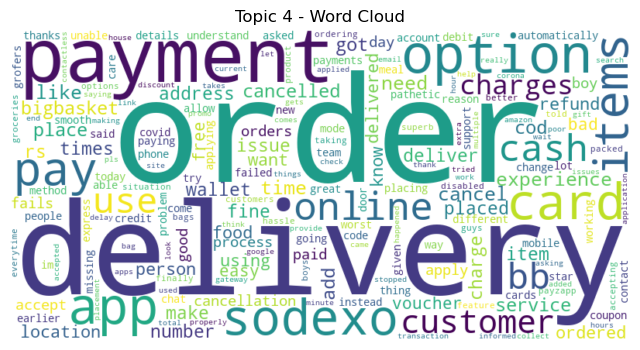

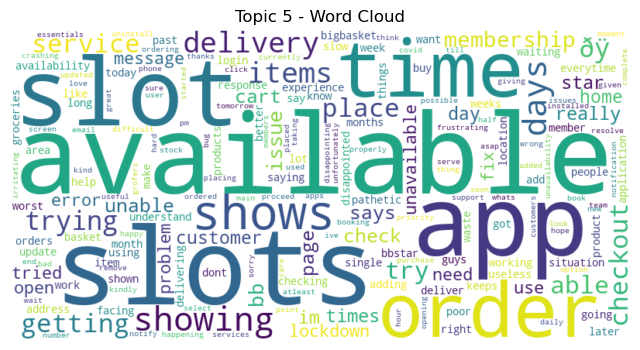

In [ ]:
# Word Clouds for Topics
for idx, topic in enumerate(lda.components_):
    plt.figure(figsize=(8, 8))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(zip(feature_names, topic)))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Topic {idx+1} - Word Cloud")
    plt.axis('off')
    plt.show()

##  <font color='Blue'> 9. Exploratory Analysis and Visualization

### <font color='Blue'> 9.1 Bar graphs for Negative, Positive and Neutral Sentiments

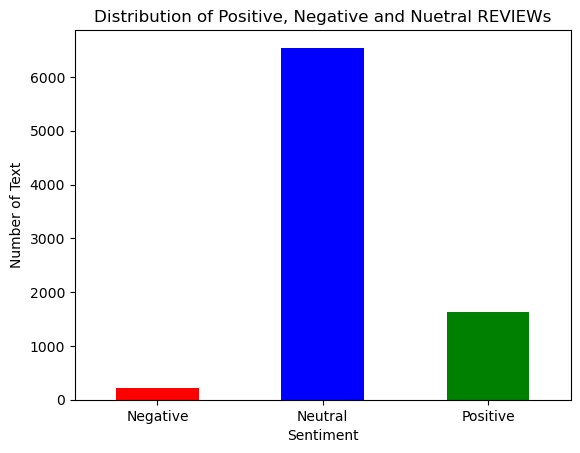

<Figure size 1400x1400 with 0 Axes>

In [ ]:
# Creating a bar chart
ax = Rdata['Sentiment'].value_counts().sort_index().plot(kind='bar', title='Distribution of data', legend=False, color=['red','blue','green'])

# Setting x-axis tick labels
ax.set_xticklabels(['Negative', 'Neutral', 'Positive'], rotation=0)
plt.title('Distribution of Positive, Negative and Nuetral REVIEWs')
plt.xlabel('Sentiment')
plt.ylabel('Number of Text')
plt.figure(figsize=(14, 14))

# Displaying the bar chart
plt.show()

### <font color='Blue'>9.2 Bar graphs for sentiments and emotions using NRClex on the non-vectorized data

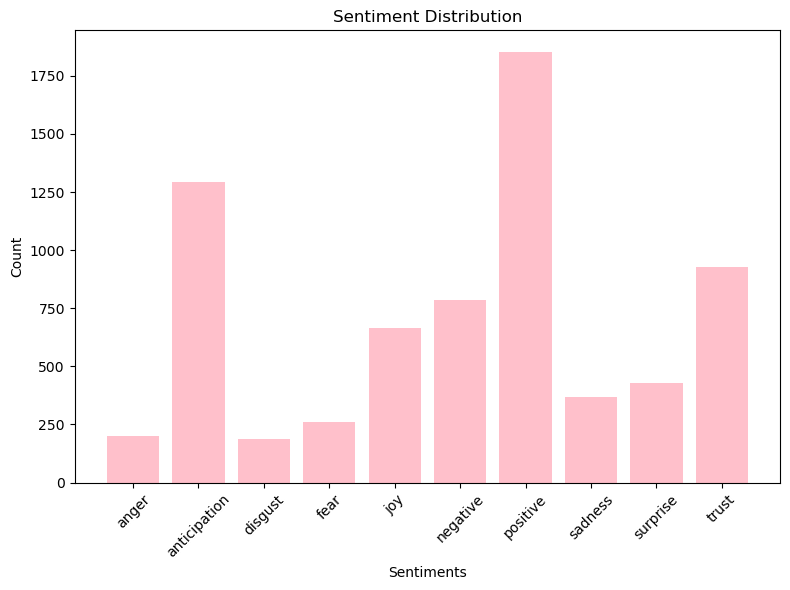

In [ ]:
sentiments = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'negative', 'positive', 'sadness', 'surprise', 'trust']
sentiment_counts = result_df[sentiments].sum()

# Creating a bar graph
plt.figure(figsize=(8, 6))
plt.bar(sentiments, sentiment_counts, color='pink')
plt.xlabel('Sentiments')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.xticks(rotation=45)
plt.tight_layout()

# Showing the plot
plt.show()

In [ ]:
sentiment_counts

anger            199.448652
anticipation    1295.211910
disgust          186.844753
fear             262.282651
joy              666.109987
negative         784.167399
positive        1853.358131
sadness          368.675212
surprise         428.308456
trust            925.592849
dtype: float64

### <font color='Blue'>9.3 Bar Graph for Most common words

#### <font color='Blue'> 9.3.1 Most Common Words in Positive reviews

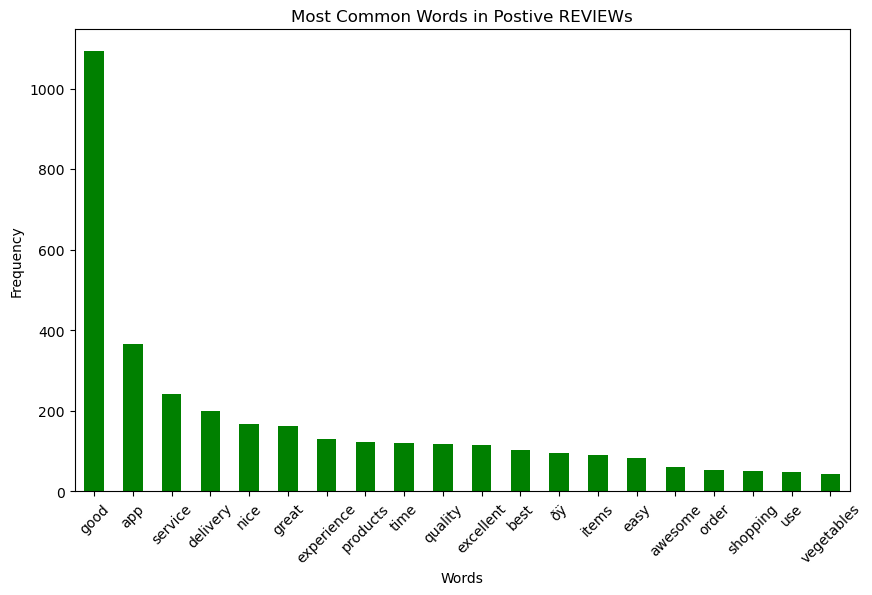

In [ ]:
positive_REVIEWs = Rdata[Rdata['Sentiment'] == 3]['REVIEW']

# Flattenning the list of lists into a single list of strings
positive_REVIEWs_flattened = [text for sublist in positive_REVIEWs for text in sublist]

# Converting the list of strings to a single string
positive_text = ' '.join(positive_REVIEWs_flattened)

# Creating the CountVectorizer
vectorizer = CountVectorizer(stop_words='english')

# Fitting and transforming the data
X11 = vectorizer.fit_transform([positive_text])

# Converting the result to a DataFrame
word_freq = pd.DataFrame(X11.toarray(), columns=vectorizer.get_feature_names_out())

# Getting the most common words
most_common_words = word_freq.sum().sort_values(ascending=False)[:20]

plt.figure(figsize=(10, 6))
most_common_words.plot(kind='bar', color='Green')
plt.title('Most Common Words in Postive REVIEWs')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


#### <font color='Blue'> 9.3.2 Most Common Words in Neutral reviews

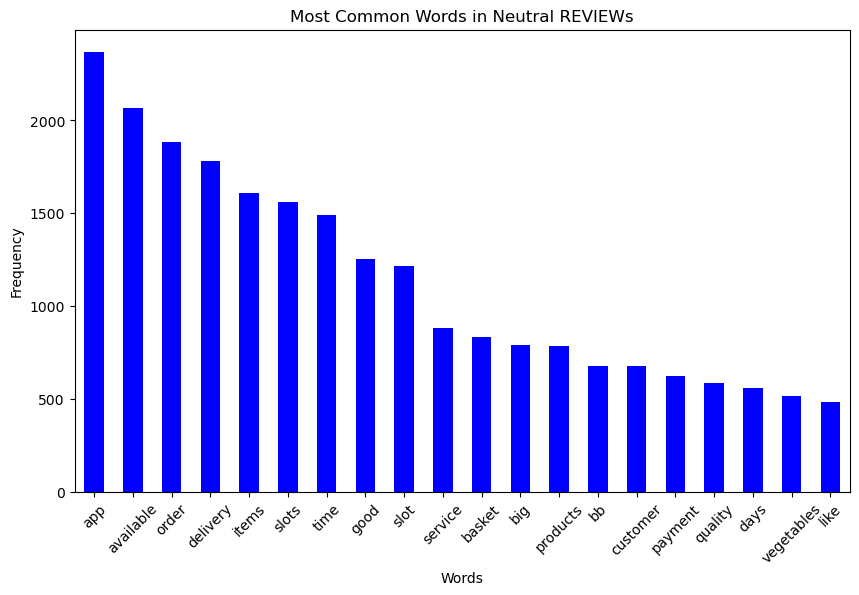

In [ ]:
neutral_REVIEWs = Rdata[Rdata['Sentiment'] == 2]['REVIEW']

# Flattenning the list of lists into a single list of strings
neutral_REVIEWs_flattened = [text for sublist in neutral_REVIEWs for text in sublist]

# Converting the list of strings to a single string
neutral_text = ' '.join(neutral_REVIEWs_flattened)

# Creating the CountVectorizer
vectorizer = CountVectorizer(stop_words='english')

# Fitting and transforming the data
X12 = vectorizer.fit_transform([neutral_text])

# Converting the result to a DataFrame
word_freq = pd.DataFrame(X12.toarray(), columns=vectorizer.get_feature_names_out())

# Getting the most common words
most_common_words = word_freq.sum().sort_values(ascending=False)[:20]

plt.figure(figsize=(10, 6))
most_common_words.plot(kind='bar', color='Blue')
plt.title('Most Common Words in Neutral REVIEWs')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


#### <font color='Blue'> 9.3.3 Most Common Words in Negative reviews

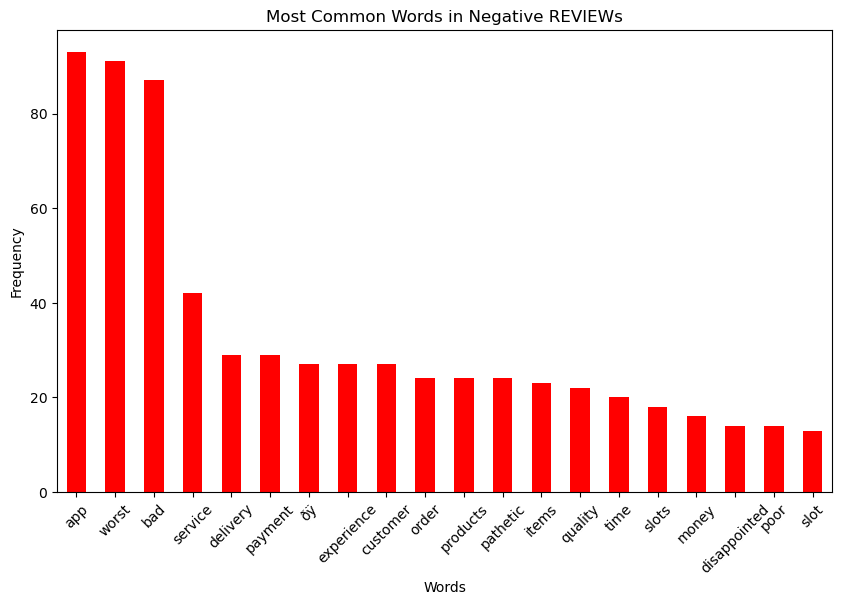

In [ ]:
negative_REVIEWs = Rdata[Rdata['Sentiment'] == 1]['REVIEW']

# Flattenning the list of lists into a single list of strings
negative_REVIEWs_flattened = [text for sublist in negative_REVIEWs for text in sublist]

# Converting the list of strings to a single string
negative_text = ' '.join(negative_REVIEWs_flattened)

# Creating the CountVectorizer
vectorizer = CountVectorizer(stop_words='english')

# Fitting and transforming the data
X13 = vectorizer.fit_transform([negative_text])

# Converting the result to a DataFrame
word_freq = pd.DataFrame(X13.toarray(), columns=vectorizer.get_feature_names_out())

# Getting the most common words
most_common_words = word_freq.sum().sort_values(ascending=False)[:20]

plt.figure(figsize=(10, 6))
most_common_words.plot(kind='bar', color='Red')
plt.title('Most Common Words in Negative REVIEWs')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

### <font color='Blue'> 9.4 2-gram most common words in reviews

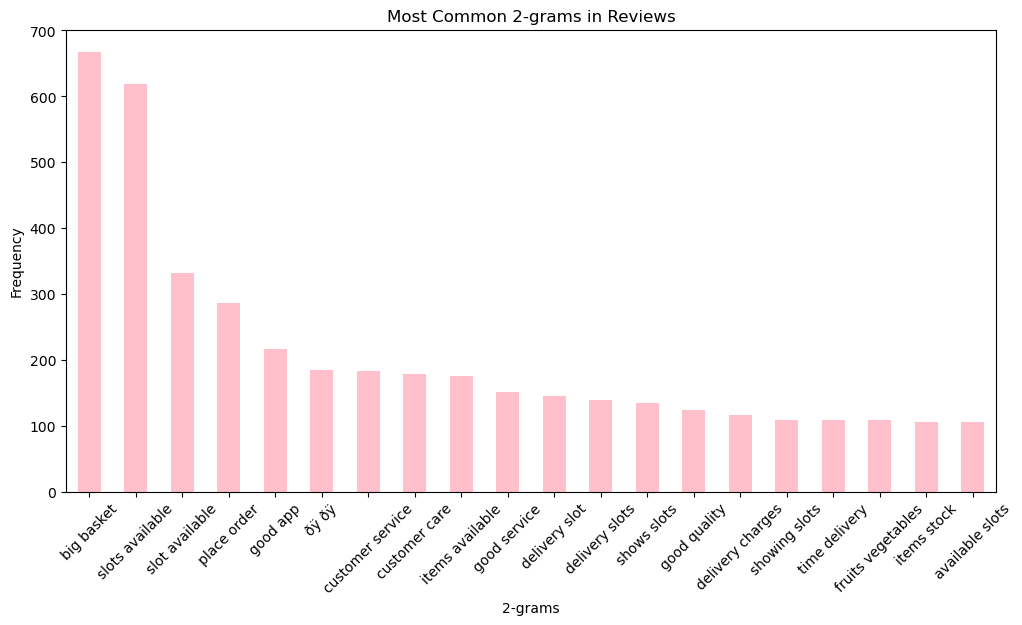

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
X = vectorizer.fit_transform(Rdata2['REVIEW'])
ngram_freq = pd.DataFrame.sparse.from_spmatrix(X, columns=vectorizer.get_feature_names_out())


most_common_ngrams = ngram_freq.sum().sort_values(ascending=False)[:20]

plt.figure(figsize=(12, 6))
most_common_ngrams.plot(kind='bar', color='pink')
plt.title('Most Common 2-grams in Reviews')
plt.xlabel('2-grams')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


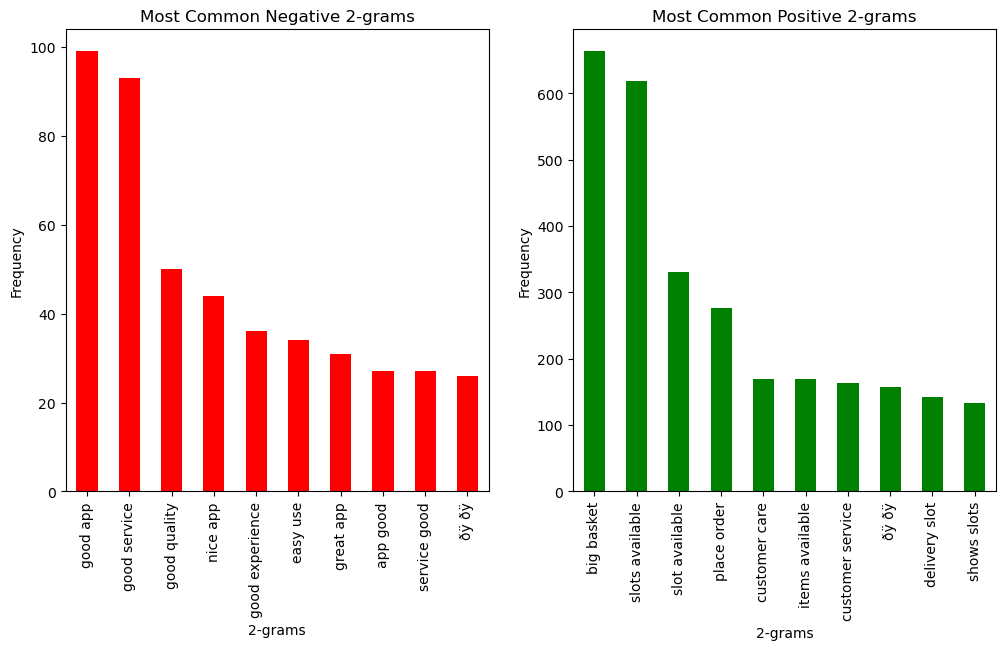

<Figure size 1200x600 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
negative_REVIEWs_ngram_freq = ngram_freq[Rdata['Sentiment'] == 3].sum()
positive_REVIEWs_ngram_freq = ngram_freq[Rdata['Sentiment'] < 3].sum()

# Plotting most common 2-grams for positive and negative Revi
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
negative_REVIEWs_ngram_freq.sort_values(ascending=False)[:10].plot(kind='bar', color='red')
plt.title('Most Common Negative 2-grams')
plt.xlabel('2-grams')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
positive_REVIEWs_ngram_freq.sort_values(ascending=False)[:10].plot(kind='bar', color='green')
plt.title('Most Common Positive 2-grams')
plt.xlabel('2-grams')
plt.ylabel('Frequency')
plt.figure(figsize=(12, 6))


plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()
